# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


<b>Описание тарифов </b> <br>
<b> 1. Тариф «Смарт» </b>
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей <br>

<b> 2. Тариф «Ультра» </b>
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

<br>В качестве исходных данных получено 5 таблиц с информацией о клиентах и тем, какими услугами и как они пользуются. Ниже приведена информация о полях таблиц.

<br><b>1. Таблица users (информация о пользователях):</b>
<br>user_id — уникальный идентификатор пользователя
<br>first_name — имя пользователя
<br>last_name — фамилия пользователя
<br>age — возраст пользователя (годы)
<br>reg_date — дата подключения тарифа (день, месяц, год)
<br>churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
<br>city — город проживания пользователя
<br>tariff — название тарифного плана

<br><b>2. Таблица calls (информация о звонках):</b>
<br>id — уникальный номер звонка
<br>call_date — дата звонка
<br>duration — длительность звонка в минутах
<br>user_id — идентификатор пользователя, сделавшего звонок

<br><b>3. Таблица messages (информация о сообщениях):</b>
<br>id — уникальный номер сообщения
<br>message_date — дата сообщения
<br>user_id — идентификатор пользователя, отправившего сообщение

<br><b>4. Таблица internet (информация об интернет-сессиях): </b>
<br>id — уникальный номер сессии
<br>mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
<br>session_date — дата интернет-сессии
<br>user_id — идентификатор пользователя


<br><b>5. Таблица tariffs (информация о тарифах):  </b>
<br>tariff_name — название тарифа
<br>rub_monthly_fee — ежемесячная абонентская плата в рублях
<br>minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
<br>messages_included — количество сообщений в месяц, включённых в абонентскую плату
<br>mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
<br>rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
<br>rub_per_message — стоимость отправки сообщения сверх тарифного пакета
<br>rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


Исследование разделено на несколько частей:

<b> Данное исследование разделим на несколько частей.

<b> Часть 1. Изучение общей информации:
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#ch_1_1)

<b> Часть 2. Предобработка данных:
* [1. Приведение данных к нужным типам.](#ch_2_1)
* [2. Нахождение и ликвидация ошибок в данных.](#ch_2_2)
* [3. Расчет и добавление данных в датафрейм.](#ch_2_3)    

<b> Часть 3. Проведение анализа выборок:
* [1. Описание поведения клиентов в зависимости от тарифа.](#ch_3_1)

<b> Часть 4. Проверка статистических гипотез:
* [1. Гипотеза об отличии средней выручки пользователей тарифов.](#ch_4_1)
* [2. Гипотеза об отличии средней выручки жителей Москвы от всех остальных.](#ch_4_2)

<b> Часть 5. Выводы:
* [1. Выводы.](#ch_5_1)

## Открытие файлов с данными и изучение общей информации <a id='ch_1_1'></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt

users = pd.read_csv('/datasets/users.csv')
internet = pd.read_csv('/datasets/internet.csv')
calls = pd.read_csv('/datasets/calls.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
messages = pd.read_csv('/datasets/messages.csv')


internet.info()
internet.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<b> Выводы </b>
<br>
На первый взгляд всё неплохо. 
В датафрейме internet один лишний столбец, все даты в формате object. Пустых значений нет. Дубликатов тоже нет.

## Предобработка данных 

### Приведение данных к нужным типам <a id='ch_2_1'></a>

In [2]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format= '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format= '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format= '%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format= '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format= '%Y-%m-%d')

Все столбцы с датами приведены к соответствующему формату.

### Нахождение и ликвидация ошибок в данных <a id='ch_2_2'></a>

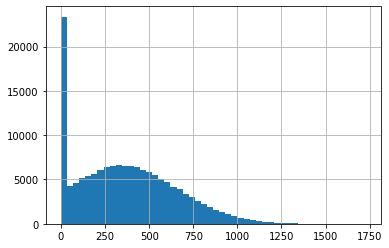

In [3]:
internet = internet.drop('Unnamed: 0', axis = 1)
internet['mb_used'].hist(bins = 50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id               202607 non-null object
call_date        202607 non-null datetime64[ns]
duration         202607 non-null float64
user_id          202607 non-null int64
nonzeroesamnt    202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB
AxesSubplot(0.125,0.125;0.775x0.755)


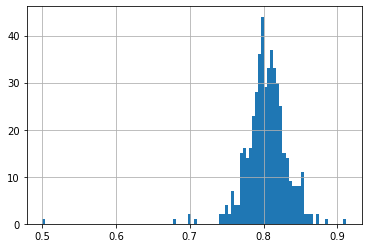

In [4]:
internet = internet.query( 'mb_used != 0')
callscut = calls.query('duration != 0')
callszero = calls.query('duration == 0')

calls['nonzeroesamnt'] = np.where(calls['duration']!=0, 1, 0)
calls.info()

pvt = calls.pivot_table(index = 'user_id', values = 'nonzeroesamnt', aggfunc = ['sum', 'count'])
pvt.columns = ['sum', 'cnt']
pvt['avg'] = pvt['sum'] / pvt['cnt']
pvt['qnt'] = pvt['cnt'] - pvt ['sum']
print(pvt['avg'].hist(bins = 100))
calls = calls.drop('nonzeroesamnt', axis = 1)

Данные с нулевым интернет траффиком удалены, за выход в интернет такое посчитать нельзя, да и смысловой нагрузки эти значения не несут. 
А вот звонки с нулевым временем разговора решено оставить. И хотя доля ненулевых по длине разговоров сконцентрирована возле 0.8, И гистаграммы с разбитием по user_id для общего df, df только с нулевыми значениями и без них выглядят похоже, это не кажется достаточно убедительными причинами для удаления данных. Нулевое время разговора может быть как для входящих звонков, так и для исходящих.

### Расчет и добавление данных в датафрейм <a id='ch_2_3'></a>

In [5]:
callsmerged = users.merge(calls, on = 'user_id')
callsmerged['month'] = pd.DatetimeIndex(callsmerged['call_date']).month

internetmerged = users.merge(internet, on = 'user_id')
internetmerged['month'] = pd.DatetimeIndex(internetmerged['session_date']).month

messagesmerged = users.merge(messages, on = 'user_id')
messagesmerged['month'] = pd.DatetimeIndex(messagesmerged['message_date']).month

#окгрулгяем данные согласно условию
callsmerged['duration'] = callsmerged['duration'].apply(np.ceil)
internetmerged['mb_used'] = internetmerged['mb_used'].apply(np.ceil)

callspivot = callsmerged.pivot_table(index = 'user_id', values = 'duration', columns = 'month', aggfunc = ['sum', 'count'])
internetpivot = internetmerged.pivot_table(index = 'user_id', values = 'mb_used', columns = 'month', aggfunc = ['sum'])
messagespivot = messagesmerged.pivot_table(index = 'user_id', values = 'id', columns = 'month', aggfunc = ['count'])

print('Кол-во звонков и сумма минут по месяцам:', callspivot.head())
print('Траффик по месяцам:', internetpivot.head())
print('Кол-во сообщений по месяцам:', messagespivot.head())

Кол-во звонков и сумма минут по месяцам:         sum                                                        ... count  \
month    1   2   3   4      5      6      7      8      9      10  ...    3    
user_id                                                            ...         
1000    NaN NaN NaN NaN  159.0  172.0  340.0  408.0  466.0  350.0  ...   NaN   
1001    NaN NaN NaN NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   NaN   
1002    NaN NaN NaN NaN    NaN  117.0  214.0  289.0  206.0  212.0  ...   NaN   
1003    NaN NaN NaN NaN    NaN    NaN    NaN  380.0  961.0  855.0  ...   NaN   
1004    NaN NaN NaN NaN   35.0  171.0  135.0  137.0  117.0  145.0  ...   NaN   

                                                                 
month    4     5     6     7     8      9      10     11     12  
user_id                                                          
1000    NaN  22.0  43.0  47.0  52.0   58.0   57.0   43.0   46.0  
1001    NaN   NaN   NaN   NaN   NaN    NaN    NaN   59

Произведено объединение таблиц по user_id, сводные таблицы для звонков, сообщений, интернет-траффика с помесячной разбивкой построены.

In [6]:
#группируем таблицы по смс, звонкам, траффику отдельно
callsgrouped = callsmerged.groupby(['month','user_id'])['duration'].agg(['sum', 'count'])
messagesgrouped = messagesmerged.groupby(['month', 'user_id'])['id'].agg(['count'])
internetgrouped = internetmerged.groupby(['month', 'user_id'])['mb_used'] .agg(['sum'])
#соединяем три таблицы, сбрасываем индекс номера месяца, подтягиваем название тарифа
tottable = callsgrouped.merge(messagesgrouped, on = ['user_id', 'month'], how = 'outer')\
                       .merge(internetgrouped, on = ['user_id', 'month'], how = 'outer')\
                       .reset_index(level = 'month')\
                       .merge(users[['user_id', 'tariff', 'city']], on = ['user_id'], how = 'outer')
#подтягиваем информацию о тарифе
tottable.columns = ['user_id', 'month', 'calls_duration', 'calls_cnt', 'messages_cnt', 'mb_used', 'tariff_name', 'city']
tottable = tottable.merge(tariffs, on = ['tariff_name'], how = 'outer')
#рассчитываем задолженность по каждому типу услуги, рассчитываем общую задолженность
tottable['messages_debt'] = np.where(tottable['messages_included'] - tottable['messages_cnt'] < 0,\
                                     (tottable['messages_cnt'] - tottable['messages_included'])\
                                     * tottable['rub_per_message'], 0)  
tottable['minutes_debt'] = np.where(tottable['minutes_included'] - tottable['calls_duration'] < 0,\
                                   (tottable['calls_duration'] - tottable['minutes_included']).apply(np.ceil)\
                                    * tottable['rub_per_minute'], 0)
tottable['gbs_debt'] = np.where(tottable['mb_per_month_included'] - tottable['mb_used'] < 0,\
                                ((tottable['mb_used'] - tottable['mb_per_month_included'])/ 1024).apply(np.ceil)\
                                * tottable['rub_per_gb'], 0) 
tottable['fee_total'] = tottable['messages_debt'] + tottable['minutes_debt'] + tottable['gbs_debt']+\
                           tottable['rub_monthly_fee']
    
print(tottable.head())


   user_id  month  calls_duration  calls_cnt  messages_cnt  mb_used  \
0     1005    1.0            95.0       15.0           7.0   2730.0   
1     1005    2.0           456.0       69.0          38.0   7394.0   
2     1005    3.0           606.0       77.0          56.0  11117.0   
3     1005    4.0           712.0      101.0          41.0   9365.0   
4     1005    5.0           595.0       73.0          42.0   7877.0   

  tariff_name              city  messages_included  mb_per_month_included  \
0       smart  Набережные Челны                 50                  15360   
1       smart  Набережные Челны                 50                  15360   
2       smart  Набережные Челны                 50                  15360   
3       smart  Набережные Челны                 50                  15360   
4       smart  Набережные Челны                 50                  15360   

   minutes_included  rub_monthly_fee  rub_per_gb  rub_per_message  \
0               500              550     

<b> Вывод </b>
<br>
Предварительно сгруппированные таблицы с информацией о звонках, смс, интернет-траффике объединены между собой. К ним присоединена информация о соответсвующем тарифе, произведен расчет суммарного платежа за тариф помесячно.

## Анализ данных

### Описание поведения клиентов в зависимости от тарифа

In [7]:
tottable.describe()

,user_id,month,calls_duration,calls_cnt,messages_cnt,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,messages_debt,minutes_debt,gbs_debt,fee_total
count,3216.000000,3214.000000,3174.000000,3174.000000,2717.000000,3201.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000
mean,1251.588930,8.317362,456.931632,63.833333,45.283769,17297.550453,341.262438,20069.253731,1266.480100,979.228856,184.670398,2.386816,2.386816,12.059701,86.510261,454.617537,1532.416356
std,144.645928,2.905413,238.031270,32.678036,35.051363,7513.504652,438.092669,7083.266729,1152.875444,645.610249,23.057509,0.922300,0.922300,34.517318,219.173942,687.158128,799.624368
min,1000.000000,1.000000,0.000000,1.000000,1.000000,202.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,550.000000
25%,1125.000000,6.000000,290.000000,41.000000,19.000000,12567.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,750.000000
50%,1253.000000,9.000000,447.000000,63.000000,38.000000,16986.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1667.500000
75%,1378.250000,11.000000,592.000000,83.000000,63.000000,21458.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,0.000000,0.000000,800.000000,1950.000000
max,1499.000000,12.000000,1673.000000,244.000000,224.000000,49789.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,279.000000,2805.000000,4600.000000,6770.000000


In [8]:
pivavgs_mnth = tottable.pivot_table(index = ['tariff_name', 'month'], values = ['calls_duration',  'messages_cnt','mb_used'], aggfunc = 'mean')
print('Средние значения помесячно: \n', pivavgs_mnth)
variances_mnth = tottable.groupby(['tariff_name', 'month'])['calls_duration', 'mb_used', 'messages_cnt'].var()
print('Дисперсии помесячно: \n', variances_mnth)
stdevs_mnth = tottable.groupby(['tariff_name', 'month'])['calls_duration', 'mb_used', 'messages_cnt'].std()
print('Cтандартные отклонения помесячно: \n',stdevs_mnth)

Средние значения помесячно: 
                    calls_duration       mb_used  messages_cnt
tariff_name month                                            
smart       1.0        203.852941   8524.441176     20.000000
            2.0        298.689655  11611.396552     27.940000
            3.0        390.051948  15123.857143     35.550725
            4.0        367.133929  13479.482143     35.864583
            5.0        387.361702  15825.198582     39.032787
            6.0        398.067485  15814.768293     38.577465
            7.0        408.353234  15763.512438     38.988506
            8.0        423.269231  16703.252137     38.750000
            9.0        430.266409  16324.526923     39.219731
            10.0       427.590444  16835.829352     39.082677
            11.0       436.647619  16917.531646     39.881481
            12.0       479.985119  18136.833828     42.264808
ultra       1.0        428.111111  13153.555556     43.428571
            2.0        297.125000  12858

Явно видно, что у тарифа ultra существенно выше и средние значения, и дисперсия (а значит, и Ст. отклонение). Чтобы не теряться в данных, уберем группировку по месяцам, выведя общие данные по тарифам.

In [9]:
pivavgs = tottable.pivot_table(index = 'tariff_name', values = ['calls_duration',  'messages_cnt','mb_used'], aggfunc = 'mean')
print('Средние значения: \n', pivavgs)
variances = tottable.groupby('tariff_name')['calls_duration', 'mb_used', 'messages_cnt'].var()
print('Дисперсии: \n', variances)
stdevs = tottable.groupby('tariff_name')['calls_duration', 'mb_used', 'messages_cnt'].std()
print('Cтандартные отклонения: \n',stdevs)

Средние значения: 
              calls_duration       mb_used  messages_cnt
tariff_name                                            
smart            419.062978  16243.763359     38.716441
ultra            545.451104  19706.979466     61.161006
Дисперсии: 
              calls_duration       mb_used  messages_cnt
tariff_name                                            
smart          35844.189551  3.434009e+07    717.594201
ultra          94203.418396  9.874650e+07   2109.659183
Cтандартные отклонения: 
              calls_duration      mb_used  messages_cnt
tariff_name                                           
smart            189.325618  5860.041941     26.787949
ultra            306.925754  9937.127298     45.931026


И если по средним разница не так велика, то стандартное отклонение по всем трём параметрам выше почти в два раза! Большая разница в разбросе!

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f26ddaf9990>,
      dtype=object)

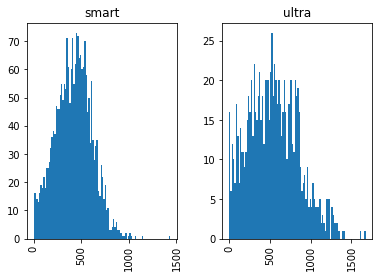

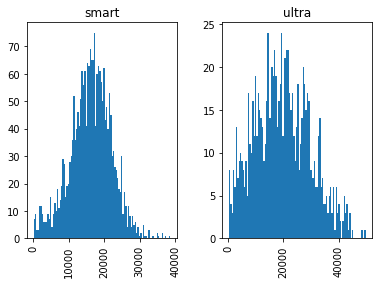

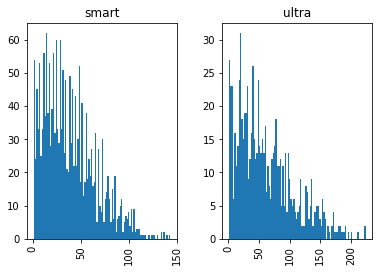

In [10]:
#tottable['']
#['calls_duration'], 'mb_used', 'messages_cnt')
#tottable['calls_duration'].hist(by = tottable['tariff_name'], bins = 100)
tottable.hist(by = tottable['tariff_name'], bins = 100, column = 'calls_duration')
tottable.hist(by = tottable['tariff_name'], bins = 100, column = 'mb_used')
tottable.hist(by = tottable['tariff_name'], bins = 100, column = 'messages_cnt')
#tottable.plot(kind = 'hist', grid = True, bins = 100, y = 'tariff_name',)

<b> Вывод </b>
<br>
Более высокие значения стандартного отклонения подтверждаются гистограммами: для всех трех параметров данные тарифа ultra скошены вправо сильнее, чем у тарифа smart. 
<br>По продолжительности звонка у тарифа smart наблюдается небольшая скошенность влево, большинство значений собраны в пределах 1000. У тарифа ultra значения разбросаны сильнее и имеют более длинный хвост.
<br>По расходу интернет траффика в тарифе smart распределение близко к нормальному. У тарифа ultra имеется небольшой скос вправо, распределение по значениям в целом равномерное.
<br>По количеству сообщений значения тарифа ultra немного более скошены вправо за счет бОльшего разброса значений.

## Проверка гипотез

### Гипотеза об отличии средней выручки пользователей тарифов.

In [11]:
avg_check = tottable.groupby('tariff_name')['fee_total'].mean()
print('Средняя выручки в зависимости от тарифа: \n', avg_check)

variances_check = tottable.groupby('tariff_name')['fee_total'].var()
print('Дисперсии выручки в зависимости от тарифа: \n', variances_check)

Средняя выручки в зависимости от тарифа: 
 tariff_name
smart    1294.305381
ultra    2070.943205
Name: fee_total, dtype: float64
Дисперсии выручки в зависимости от тарифа: 
 tariff_name
smart    673877.623614
ultra    143360.429258
Name: fee_total, dtype: float64


Средняя выручка у тарифа ultra выше почти в 2 раза! Проверим это с помощью теста. Разброс дисперсий значительный - у тарифа smart в 4+ раза больше.

In [12]:
smart_fees = tottable.query('tariff_name == "smart"').groupby('user_id')['fee_total'].mean()
ultra_fees = tottable.query('tariff_name == "ultra"').groupby('user_id')['fee_total'].mean()

alpha = 0.05
results = st.ttest_ind(smart_fees, ultra_fees, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
      print("Отвергаем нулевую гипотезу")
else:
      print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.26252224448908e-59
Отвергаем нулевую гипотезу


<b> Вывод </b>
<br>
Нулевая гипотеза сформирована как "Средняя выручка для тарифов smart и ultra равна".
<br>Альтернативная гипотеза - "Средняя выручка для тарифов smart и ultra не равна"

Есть возможность рассмотреть весь датасет для каждого из тарифов, поэтомиу уместно применять метод для проверки гипотез двух генеральных совокупностей. Среди параметров важно указать equal_var = False, т.к. в зависимости от тарифов дисперсии совокупностей значительно отличаются. 

По результатам теста нулевая гипотеза отвергается, а значит, средняя выручка в зависимости от тарифа значимо различна.

### Гипотеза об отличии средней выручки жителей Москвы от всех остальных.

In [13]:
tottable['moscow_or_not'] = np.where(tottable['city'] == 'Москва', 'Moscow', 'province')
mean_city = tottable.groupby('moscow_or_not')['fee_total'].mean()
print('Средние выручки в зависимости от города: \n', mean_city)

variances_city = tottable.groupby('moscow_or_not')['fee_total'].var()
print('Дисперсии выручки в зависимости от города: \n', variances_city)

Средние выручки в зависимости от города: 
 moscow_or_not
Moscow      1550.805237
province    1528.103263
Name: fee_total, dtype: float64
Дисперсии выручки в зависимости от города: 
 moscow_or_not
Moscow      566183.029218
province    656697.958227
Name: fee_total, dtype: float64


Видно, что фактические средние выручки практически не отличаются в зависимости от того, из Москвы клиент или нет. Дисперсии немного отличаются. Перепроверим это статистическим тестом.

In [14]:
moscow_fees = tottable.query('city == "Москва"').groupby('user_id')['fee_total'].mean()
regions_fees = tottable.query('city != "Москва"').groupby('user_id')['fee_total'].mean()

alpha = 0.05
results = st.ttest_ind(moscow_fees, regions_fees, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
      print("Отвергаем нулевую гипотезу")
else:
      print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.36837479573900667
Не получилось отвергнуть нулевую гипотезу


<b> Вывод </b>
<br>
Нулевая гипотеза сформирована как "Средняя выручка для клиентов из Москвы и регионов равна".
<br>Альтернативная гипотеза - "Средняя выручка для клиентов из Москвы и регионов не равна".

Есть возможность рассмотреть весь датасет для каждого из городов, поэтому уместно применять метод для проверки гипотез двух генеральных совокупностей. Среди параметров нужно указать equal_var = False, т.к. в зависимости от городов дисперсии совокупностей отличаются. 

По результатам теста нулевую гипотезу отвергнуть нельзя. Хоть средние выручки неодинаковы, но с вероятностью в почти 37% такое или бОльшее различие можно получить случайно. Такая вероятность слишком велика, чтобы делать вывод о значимом различии между средними выручками клиентов из Москвы и регионов.  

## Общий вывод

После проведения расчетов и статистических тестов, можно сказать, что тариф ultra является более выгодным для компании. Средняя выручка по нему выше с почти в два раза, что значительно. 

Также можно сказать, что тариф ultra выбирают в среднем более требовательные пользователи: количество совершенных звонков, отправленных сообщений, использованных мегабайт трафика у них в среднем выше. 

В частности,  пользователи тарифа ultra разговаривают в среднем 545 минут против 419 у пользователей тарифа smart. В расходе трафика лидерство также за пользователями тарифа ultra: почти 20 Гб трафика против 16 Гб. А по количеству сообщений разница и того больше, более чем в полтора раза: 39 сообщений на smart и 61 на ultra.
 

Впрочем, выше также и дисперсии по этим показателям для этого тарифа, что значит, что выдающихся в ту или иную сторону от среднего значения клиентов довольно много. 

На первый взгляд, эти повышенные дисперсии по частоте пользования услугами могут ввести в сомнения касательно внедрения тарифа ultra, но тут важно приметить ценообразование тарифа: за счёт высокой ежемесячной платы и лимитов, и низкой стоимости услуг вне пакета, разброс по выручке по сравнению с тарифом smart очень мал. Это значит, что приток денег с тарифа будет постоянен от месяца к месяцу при прочих равных. Однозначно хорошо!